# Table of Contents

1. Introduction
2. Import Libraries & Packages
3. Meeting in London
4. Mapping London
5. Walking Together Since

# 1. Introduction

Dear Mochi, 

I've often thought about how we met - at the South Asian Literature Festival at Rich Mix in London on October 9, 2011, sitting next to each other at the Sheherazade performance - and marveled at the cosmic odds. How we overlapped living in London for a few short months. How we went to the same event, how we we happened to be sitting next to each other. How I was originally not even planning on attending that 2nd day of the event. I wanted to dig further, to see if there's still anything up online about that event, to bring to life all the places we went to together, and, just for fun, estimate how many steps we've walked together. So that's what I've tried to do. I hope you like it. 

First, on the event itself, I wasn't able to find too much remaining information or a program detail on it, but, scraped a few details from a site highlighting it using BeautifulSoup. I also displayed a couple of photos of Rich Mix and where we sat using IPython's Image method. 

Next, I wanted to create a map for you of all of our favorite places in London. In order to do that, I created a dataframe of our favorite places (at least the ones I could remember), geocoded them by grabbing their latitude and longitude using Nominatim, and plotted an interactive zoom & pop-up map using Folium. 

Finally, I wanted to tell you how many steps we've each taken together. Since I didn't have consistent, reliable fitbit or Apple Watch data, I simulated steps that we've each walked together starting from the day we met. To do this, I first generated a right-skewed normal distribution (skewness of a=12) to account for the higher-end outlier vacation and weekend days (ahem, remember the 30,000 steps we took at Amalfi). The sample size is the number of days since we met. It's not exact, but, knowing our average daily and outlier behavior, it's a close approximation. I corrected for negative steps and pulled from this distribution to simulate a random walk to then get the cumulative sum of steps. We've each walked 19,246,605 steps together!

What was even better than seeing the end results was reliving so many beautiful memories of when we first met. 

Excited for the next 20 millions steps,
<br>Squirrel

# 2. Import Libraries & Packages

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from numpy.random import normal, seed
from numpy.random import choice 
import random
from random import sample
from scipy.stats import norm
from scipy.stats import skewnorm # to create right-skewed distribution
from datetime import datetime 
from datetime import date
import itertools
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Displaying images
from IPython.display import Image
from IPython.core.display import HTML 

!pip install geopy
from geopy.geocoders import Nominatim # convert address into latitude and longitude
import requests

!pip install folium
import folium
from folium import plugins 

# Web scraping using BeautifulSoup
from urllib.request import urlopen
from bs4 import BeautifulSoup
!pip install lxml # Install lxml parser as it's faster than the built-in html parser

     |████████████████████████████████| 102kB 11.6MB/s ta 0:00:01


# 3. Meeting in London

On the event itself, I wasn't able to find too much remaining information or a program detail on it, but, scraped a few details from a site highlighting it using BeautifulSoup. I also displayed a couple of photos of Rich Mix and where we sat using IPython's Image method. 

In [2]:
# Specify url and get html from page. This is the only real url I see left from the festival, couldn't find a full program
url = "https://culture360.asef.org/news-events/london-dsc-south-asian-literature-festival/"
html = urlopen(url)

In [3]:
# Create BeautifulSoup object using lxml parser we imported
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

In [4]:
# Print title of the page as a check - it's the South Asian Literature Festival
title = soup.title
print(title)

<title>London | DSC South Asian Literature Festival | ASEF culture360</title>


In [5]:
# Some of the other headlines going on at that time from the page
for headlines in soup.find_all("h3"):
    print(headlines.text.strip())

Similar content
DSC Prize for South Asian Literature shortlist
South Korean novelist announced as first woman to win Man Asian Literary Prize
Announcing the end of Man Asian Literary Prize sponsorship
Man Asian Literary Prize 2010 | longlist announced
Man Asian Literary Prize shortlist announced
Man Asian Literary Prize


While I was on a business trip a couple of years ago, I actually had a chance to revisit Rich Mix. I told the receptionist about the story and she let me take some photos inside. 

In [6]:
# Load image using Image method we imported from iPython display
Image(url= "https://i2.wp.com/crawstat.com/wp-content/uploads/2020/09/DSCF2308-2.jpg?resize=1200%2C1800&ssl=1", width=300, height=600)

In [7]:
# Load image using Image method we imported from iPython display
Image(url= "https://i0.wp.com/crawstat.com/wp-content/uploads/2020/09/DSCF2309-2.jpg?resize=1200%2C796&ssl=1", width=600, height=300)

# 4. Mapping London

I wanted to create a map for you of all of our favorite places in London. In order to do that, I created a dataframe of our favorite places (at least the ones I could remember), geocoded them by grabbing their latitude and longitude using Nominatim, and plotted an interactive zoom & pop-up map using Folium. 

### Create dataframe

In [8]:
# Create dataframe of our favorite places we used to hang out at in London (latitudes and longitudes not known yet)
Place = ['Rich Mix', 'Asa Kusa', 'Amici', 'Dishoom Covent Garden', 'Dishoom Shoreditch', 'Barrio Shoreditch', 'Covent Garden Hotel', 'Putney Bridge', 'Wimbledon', 'Southbank', 'Wright Brothers Spitalfields', 'Hoxton Grill', 'Nightjar', 'Le Fez', 'La Petite Maison', 'Shampers', 'River Cafe Putney', 'Victoria & Albert', 'Saatchi Gallery', 'Tate Modern', 'Borough Market', 'Brick Lane Bookshop', 'Brick Lane Market', 'Fuller\'s Ale & Pie House', 'Hyde Park', 'Princi','160 New Kings Road']
Latitude = [''] * 27
Longitude = [''] * 27
df = {'Place':Place,'Latitude': Latitude,'Longitude':Longitude}
london = pd.DataFrame(data=df, columns =['Place', 'Latitude', 'Longitude'], index=None )
london

,Place,Latitude,Longitude
0,Rich Mix,,
1,Asa Kusa,,
2,Amici,,
3,Dishoom Covent Garden,,
4,Dishoom Shoreditch,,
5,Barrio Shoreditch,,
6,Covent Garden Hotel,,
7,Putney Bridge,,
8,Wimbledon,,
9,Southbank,,


### Geocode

In [9]:
# Lists for places, latitude, longitude
Places = london['Place'].tolist()
Latitudes = []
Longitudes = []

# Get latitude and longitude of each place using nominatim 
for i in range(len(Places)):
    address = '{},London,England'.format(Places[i])
    geolocator = Nominatim(user_agent="london_explorer") # Define user_agent in order to instantiate geocoder, let's use london_explorer
    location = geolocator.geocode(address)
    Latitudes.append(location.latitude)
    Longitudes.append(location.longitude)
print(Latitudes, Longitudes)

[51.5243518, 51.5340008, 51.5465143, 51.51243615, 51.52449915, 51.5266694, 51.51454355, 51.4682995, 51.4214787, 51.4287749, 51.52004565, 51.5255789, 51.5264775, 51.52201, 51.5126169, 51.5123132, 51.4840371, 51.5223564, 51.49058445, 51.507456649999995, 51.50558625, 51.522337, 51.5242738, 51.5139117, 51.5074889, 51.513804050000005, 51.4712024] [-0.0730953, -0.1383005, -0.1035031, -0.1268407916611087, -0.07682461039550176, -0.0798926, -0.12714720687474967, -0.2087947, -0.2064027, 0.0696267, -0.07555948465168154, -0.0829588, -0.0877808, -0.2080525, -0.1461126, -0.13863157693077593, -0.224212, -0.16348117642609494, -0.15878382775862238, -0.09934365815375101, -0.090487028540277, -0.0714881089253187, -0.0715608, -0.11146836718248274, -0.16223668308067218, -0.1344626465765441, -0.2066763]


In [10]:
# Create dataframe of places with latitude and longitude
df_places = {'Place': Places,'Latitude': Latitudes,'Longitude':Longitudes}
london = pd.DataFrame(data=df_places, columns=['Place', 'Latitude', 'Longitude'], index=None)
london

,Place,Latitude,Longitude
0,Rich Mix,51.524352,-0.073095
1,Asa Kusa,51.534001,-0.138300
2,Amici,51.546514,-0.103503
3,Dishoom Covent Garden,51.512436,-0.126841
4,Dishoom Shoreditch,51.524499,-0.076825
5,Barrio Shoreditch,51.526669,-0.079893
6,Covent Garden Hotel,51.514544,-0.127147
7,Putney Bridge,51.468300,-0.208795
8,Wimbledon,51.421479,-0.206403
9,Southbank,51.428775,0.069627


In [11]:
# The last address is actually the one for my old apartment in London, let's change it to 'My apartment'
london.replace('160 New Kings Road', 'My apartment', inplace=True)
london

,Place,Latitude,Longitude
0,Rich Mix,51.524352,-0.073095
1,Asa Kusa,51.534001,-0.138300
2,Amici,51.546514,-0.103503
3,Dishoom Covent Garden,51.512436,-0.126841
4,Dishoom Shoreditch,51.524499,-0.076825
5,Barrio Shoreditch,51.526669,-0.079893
6,Covent Garden Hotel,51.514544,-0.127147
7,Putney Bridge,51.468300,-0.208795
8,Wimbledon,51.421479,-0.206403
9,Southbank,51.428775,0.069627


### Map

In [12]:
# Use geopy to obtain latitude and longitude of London for base map
address = 'London, England'
geolocator = Nominatim(user_agent="london_explorer") # Need to define user_agent in order to instantiate geocoder. Here we use ny_explorer as the name of the user_agent
location = geolocator.geocode(address)
lat = location.latitude
long = location.longitude
print('The latitude and longitude of London are {}, {}.'.format(lat, long))

The latitude and longitude of London are 51.5073219, -0.1276474.


In [13]:
# Visualize Pankow with interactive zoom and pop-up map using folium and latitude, longitude values we got above
map_london = folium.Map(location=[lat, long], zoom_start=12)

# Add markers to map
for lat, long, label in zip(london['Latitude'], london['Longitude'], london['Place']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, long],
        radius=7,
        popup=label,
        color='gray',
        fill=True,
        fill_color='#00ffff',
        fill_opacity=0.8,
        parse_html=False).add_to(map_london)  
    
map_london

# 5. Walking Together Since

I wanted to tell you how many steps we've each taken together. Since I didn't have consistent, reliable fitbit or Apple Watch data, I simulated steps that we've each walked together starting from the day we met. To do this, I first generated a right-skewed normal distribution (skewness of a=12) to account for the higher-end outlier vacation and weekend days (ahem, remember the 30,000 steps we took at Amalfi). The sample size is the number of days since we met. It's not exact, but, knowing our average daily and outlier behavior, it's a close approximation. I corrected for negative steps and pulled from this distribution to simulate a random walk to then get the cumulative sum of steps. We've each walked 19,246,605 steps together!

### Create datetime-indexed dataframe 

In [14]:
# Create an index of datetimes starting with the day we met, October 9, 2011
day_we_met = '2011-10-09'
index = pd.date_range(start=day_we_met, end=datetime.now(), freq='D')
index

DatetimeIndex(['2011-10-09', '2011-10-10', '2011-10-11', '2011-10-12',
               '2011-10-13', '2011-10-14', '2011-10-15', '2011-10-16',
               '2011-10-17', '2011-10-18',
               ...
               '2020-09-06', '2020-09-07', '2020-09-08', '2020-09-09',
               '2020-09-10', '2020-09-11', '2020-09-12', '2020-09-13',
               '2020-09-14', '2020-09-15'],
              dtype='datetime64[ns]', length=3265, freq='D')

In [15]:
# We met on a Sunday, let's confirm by looking at the first date in the index (it was around 6 PM to be exact)
index[0].day_name()

'Sunday'

In [16]:
# Create dataframe with datetime index above
pd.DataFrame({'data': index}).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3265 entries, 0 to 3264
Data columns (total 1 columns):
data    3265 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 25.6 KB


In [17]:
# Create size variable which counts the days since we met
size=pd.DataFrame({'data':index}).count()

### Generate right-skewed normal distribution

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:10: DeprecationWarning: object of type <class 'pandas.core.series.Series'> cannot be safely interpreted as an integer.


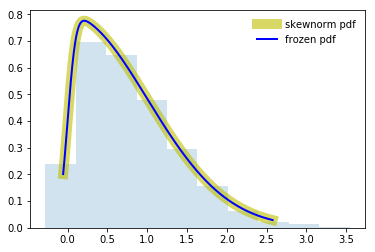

In [18]:
# Set a random seed for reproducibility (here I used the date for the day we met)
seed(10092011)

# Create right-skewed normal distribution using skewnorm
fig, ax = plt.subplots(1, 1)

# Skewness of 12 to account for higher end outlier vacation and weekend walking days
a = 12
mean, var, skew, kurt = skewnorm.stats(a, moments='mvsk')
x = np.linspace(skewnorm.ppf(0.01, a), skewnorm.ppf(.99, a), size)

# Plot probablity density function
ax.plot(x, skewnorm.pdf(x, a), 'y-', lw=10, alpha=0.6, label='skewnorm pdf')

# Distribution can also be called as a function to fix shape, mean, std (frozen distribution holding parameters fixed)
rv = skewnorm(a)

# Plot probabilty desity function 
ax.plot(x, rv.pdf(x), 'b-', lw=2, label='frozen pdf')
ax.legend()

# Generate random numbers, use size as the number of days we met in the size variable above 
r = skewnorm.rvs(a, size=size)

ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

### Populate dataframe

In [19]:
# Create data for steps for each day by multiplying the distribution by 7000 (rough mental approximate of steps per day incorporating outliers)
data = r*7000

# Create dataframe
steps = pd.DataFrame(data=data, index=index)
steps.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3265 entries, 2011-10-09 to 2020-09-15
Freq: D
Data columns (total 1 columns):
0    3265 non-null float64
dtypes: float64(1)
memory usage: 51.0 KB


In [20]:
# Check first 3 and last 3 rows
pd.concat([steps.head(3), steps.tail(3)])

,0
2011-10-09,2525.724766
2011-10-10,1095.877235
2011-10-11,3466.758188
2020-09-13,12575.046824
2020-09-14,6839.364607
2020-09-15,5287.287438


In [21]:
# Rename column to 'steps_per_day'
steps.rename(columns={0:'steps_per_day'}, inplace=True)
steps.head()

,steps_per_day
2011-10-09,2525.724766
2011-10-10,1095.877235
2011-10-11,3466.758188
2011-10-12,4083.661822
2011-10-13,9271.493424


In [22]:
# Since a normal distribution goes from -infinity to infinity and we can't have negative steps, let's replace negative numbers with the mean number of steps
mean_steps = steps['steps_per_day'].mean()
steps = steps.mask(steps<0, mean_steps)

# Round steps to 0 decimals
steps.round(0)

# Change data type from float to integer
steps['steps_per_day']= steps['steps_per_day'].astype(int)

steps.head()

,steps_per_day
2011-10-09,2525
2011-10-10,1095
2011-10-11,3466
2011-10-12,4083
2011-10-13,9271


### Distribution

As we've made modifications to the steps above (removed negative numbers), let's draw a random sample from those steps using .choice to get and plot a distribution of random steps. 

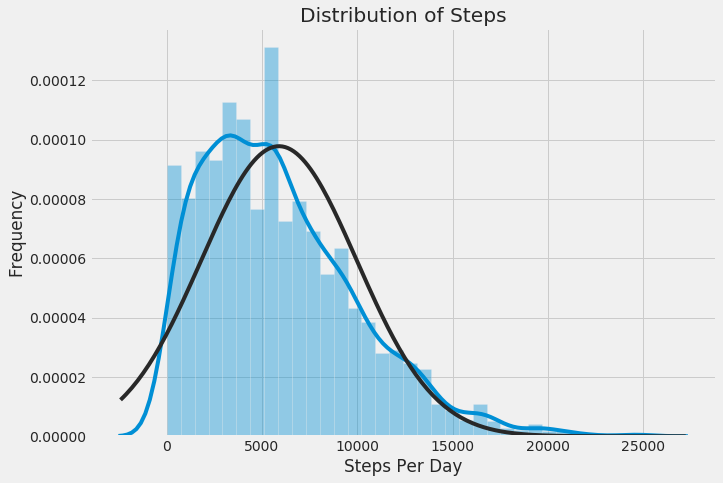

In [23]:
# Set seaborn plot style
sns.set_style("dark")

# Set matplotlib plot style
style.use("fivethirtyeight")

# Create series from steps per day to pull from
random_steps = steps['steps_per_day']

# Number of total observations
n_obs=random_steps.count()

# Create random walk pulling from random steps
random_walk = choice(random_steps, size=n_obs)

# Convert to series, make sure to set index as the original index
random_walk = pd.Series(random_walk, index=steps.index)

# Plot distribution of steps per day
plt.figure(figsize=(10,7))
sns.distplot(random_walk, fit=norm)
plt.ylabel("Frequency")
plt.xlabel("Steps Per Day")
plt.title("Distribution of Steps")
plt.show()

Looking at the boxplot, the mean number of steps per day is 5000 while the outlier higher-end vacation and weekend walking days are black circles.

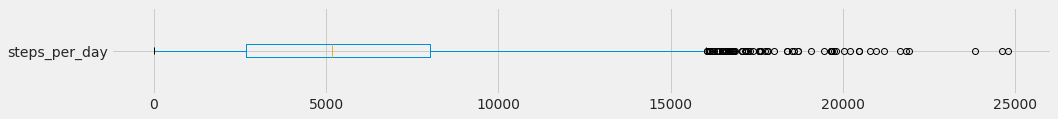

In [24]:
# Boxplot of steps
steps.boxplot(vert=False, figsize=(15,1.5))

In [25]:
# Statistical summary of steps
steps.describe()

,steps_per_day
count,3265.000000
mean,5778.002450
std,4056.066363
min,11.000000
25%,2669.000000
50%,5175.000000
75%,8017.000000
max,24802.000000


### Cumulative steps walked

In [26]:
# Select start as first day
start = steps['steps_per_day'].first('D')

# Cumulative sum of steps in random walk starting on first day
cumulative_random_walk=start.append(random_walk).cumsum()

# Print number of steps in last row
print('We\'ve each taken {} steps together.'.format(cumulative_random_walk[-1]))

We've each taken 19246605 steps together.
